# **Predictive Analytics: Prediksi Diabetes**


---
Proyek ini menggunakan dataset **Pima Indians Diabetes** dari Kaggle untuk membangun model prediktif yang dapat mengidentifikasi individu dengan potensi risiko diabetes berdasarkan faktor seperti kadar glukosa, tekanan darah, indeks massa tubuh (BMI), dan usia. [`dataset`](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

## **1. Business Understanding**
Membangun model klasifikasi berbasis machine learning yang dapat memprediksi status diabetes seorang pasien secara prediktif berdasarkan fitur-fitur medis

## **2. Data Understanding**
Proyek ini menggunakan dataset Pima Indians Diabetes dari Kaggle untuk membangun model prediktif yang dapat mengidentifikasi individu dengan potensi risiko diabetes berdasarkan faktor seperti kadar glukosa, tekanan darah, indeks massa tubuh (BMI), dan usia. [dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

### **2.1 Data Loading**
Pada tahap ini, beberapa langkah dilakukan untuk memuat dataset yang akan digunakan dalam analisis.

#### **Import Library yang dibutuhkan**
Pada tahap awal proyek ini, dimulai dengan mengimpor berbagai library yang akan digunakan untuk analisis dan pemodelan data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
print("Silakan upload file kaggle.json")
files.upload()

Silakan upload file kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jyulii","key":"f6484d9c92a65bfd53a11049563c2d1c"}'}

In [3]:
#Membuat direktori .kaggle dan menyalin file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset dari Kaggle
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 35.7MB/s]


In [4]:
import zipfile

with zipfile.ZipFile("pima-indians-diabetes-database.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

print("Dataset berhasil diunduh dan diekstrak ke folder 'dataset'")

Dataset berhasil diunduh dan diekstrak ke folder 'dataset'


### **2.2 Exploratory Data Analysis (EDA)**

#### **2.2.1 Deskripsi Variabel**

In [5]:
df = pd.read_csv('dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataframe diatas memiliki 9 kolom yaitu:

- `Pragnancies`: Jumlah kehamilan yang pernah dialami individu.  
- `Glucose`: Konsentrasi glukosa plasma (mg/dL) yang diukur selama tes toleransi glukosa oral.  
- `BloodPressure`: Tekanan darah diastolik (mm Hg).  
- `Skinthickness`: Ketebalan lipatan kulit (mm) di bagian tricep.  
- `Insulin`: Kadar insulin serum 2 jam (mu U/ml).  
- `BMI`: Indeks Massa Tubuh (BMI).  
- `DiabetesPedigree`: Fungsi silsilah diabetes, yang mewakili kemungkinan terkena diabetes berdasarkan riwayat keluarga.  
- `Age`: Usia individu (tahun).  
- `Outcome`: Label biner yang menunjukkan apakah individu menderita diabetes (1) atau tidak (0).





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- **Jumlah Entri dan Kolom:**
Dataset berisi 768 entri (baris) dan 9 kolom. Setiap kolom mewakili atribut atau fitur yang berbeda. Setiap kolom dalam dataset tidak ada nilai yang hilang.
- **Tipe Data:**
Tipe data yang digunakan adalah int64 untuk sebagian besar kolom, kecuali BMI dan DiabetesPedigreeFunction, yang memiliki tipe float64.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Fungsi `describe()` menyajikan ringkasan statistik deskriptif untuk setiap kolom numerik dalam dataset. Informasi yang ditampilkan meliputi:

- Count: jumlah total data (sampel) pada kolom tersebut.
- Mean: nilai rata-rata dari seluruh data pada kolom.
- Std: standar deviasi, mengukur seberapa besar sebaran data dari rata-ratanya.
- Min: nilai terkecil dalam kolom.
- 25%: kuartil pertama, yaitu nilai di bawah 25% data berada.
- 50%: kuartil kedua atau median, yaitu titik tengah dari distribusi data.
- 75%: kuartil ketiga, artinya 75% data berada di bawah nilai ini.
- Max: nilai terbesar dalam kolom.

#### **2.2.2 Menangani Missing Value dan Outliers**

##### Menangani Missing Value
Sebelum melanjutkan ke tahap analisis dan pemodelan, penting untuk memastikan bahwa tidak terdapat duplikasi maupun nilai hilang (missing value) dalam dataset.

In [8]:
# Melihat data duplikat
df.duplicated().sum()

np.int64(0)

In [9]:
# Melihat data yang hilang
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
df.shape

(768, 9)

#### Menangani Outliner
Pada tahapan menanagi Outliner, akan dilakukan dengan teknik visualisasi data (boxplot). Kemudian, akan menangani outliers dengan teknik IQR method.

In [11]:
from IPython.display import display  # Untuk menampilkan data dalam bentuk tabel di notebook

# Menentukan kolom numerik yang perlu diperiksa
columns_to_check = df.select_dtypes(include='number').columns.tolist()
if 'Outcome' in columns_to_check:
    columns_to_check.remove('Outcome')  # Menghapus kolom 'Outcome' karena ini adalah target

# Fungsi untuk mendeteksi outlier menggunakan IQR (Interquartile Range)
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Kuartil pertama
        Q3 = df[col].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Menghitung IQR
        lower_bound = Q1 - 1.5 * IQR  # Batas bawah untuk outlier
        upper_bound = Q3 + 1.5 * IQR  # Batas atas untuk outlier
        outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]  # Menyaring data yang berada di luar batas
        outliers[col] = outlier_rows  # Menyimpan hasil deteksi outlier per kolom
    return outliers  # Mengembalikan hasil outlier

# Mendapatkan outlier untuk kolom numerik
outlier_dict = detect_outliers_iqr(df, columns_to_check)

# Menampilkan hasil deteksi outlier
for col, rows in outlier_dict.items():
    print(f"\nOutlier pada kolom {col}:")
    if not rows.empty:
        display(rows[columns_to_check])  # Menampilkan baris dengan outlier
    else:
        print("Tidak ada outlier")


Outlier pada kolom Pregnancies:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
159,17,163,72,41,114,40.9,0.817,47
298,14,100,78,25,184,36.6,0.412,46
455,14,175,62,30,0,33.6,0.212,38



Outlier pada kolom Glucose:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
75,1,0,48,20,0,24.7,0.140,22
182,1,0,74,20,23,27.7,0.299,21
342,1,0,68,35,0,32.0,0.389,22
349,5,0,80,32,0,41.0,0.346,37
502,6,0,68,41,0,39.0,0.727,41



Outlier pada kolom BloodPressure:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
7,10,115,0,0,0,35.3,0.134,29
15,7,100,0,0,0,30.0,0.484,32
18,1,103,30,38,83,43.3,0.183,33
43,9,171,110,24,240,45.4,0.721,54
49,7,105,0,0,0,0.0,0.305,24
60,2,84,0,0,0,0.0,0.304,21
78,0,131,0,0,0,43.2,0.270,26
81,2,74,0,0,0,0.0,0.102,22
84,5,137,108,0,0,48.8,0.227,37
106,1,96,122,0,0,22.4,0.207,27



Outlier pada kolom SkinThickness:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
579,2,197,70,99,0,34.7,0.575,62



Outlier pada kolom Insulin:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
54,7,150,66,42,342,34.7,0.718,42
111,8,155,62,26,495,34.0,0.543,46
139,5,105,72,29,325,36.9,0.159,28
153,1,153,82,42,485,40.6,0.687,23
186,8,181,68,36,495,30.1,0.615,60
220,0,177,60,29,478,34.6,1.072,21
228,4,197,70,39,744,36.7,2.329,31
231,6,134,80,37,370,46.2,0.238,46



Outlier pada kolom BMI:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
9,8,125,96,0,0,0.0,0.232,54
49,7,105,0,0,0,0.0,0.305,24
60,2,84,0,0,0,0.0,0.304,21
81,2,74,0,0,0,0.0,0.102,22
120,0,162,76,56,100,53.2,0.759,25
125,1,88,30,42,99,55.0,0.496,26
145,0,102,75,23,0,0.0,0.572,21
177,0,129,110,46,130,67.1,0.319,26
193,11,135,0,0,0,52.3,0.578,40
247,0,165,90,33,680,52.3,0.427,23



Outlier pada kolom DiabetesPedigreeFunction:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137,40,35,168,43.1,2.288,33
12,10,139,80,0,0,27.1,1.441,57
39,4,111,72,47,207,37.1,1.390,56
45,0,180,66,39,0,42.0,1.893,25
58,0,146,82,0,0,40.5,1.781,44
100,1,163,72,0,0,39.0,1.222,33
147,2,106,64,35,119,30.5,1.400,34
187,1,128,98,41,58,32.0,1.321,33
218,5,85,74,22,0,29.0,1.224,32
228,4,197,70,39,744,36.7,2.329,31



Outlier pada kolom Age:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
123,5,132,80,0,0,26.8,0.186,69
363,4,146,78,0,0,38.5,0.520,67
453,2,119,0,0,0,19.6,0.832,72
459,9,134,74,33,60,25.9,0.460,81
489,8,194,80,0,0,26.1,0.551,67
537,0,57,60,0,0,21.7,0.735,67
666,4,145,82,18,0,32.5,0.235,70
674,8,91,82,0,0,35.6,0.587,68
684,5,136,82,0,0,0.0,0.640,69


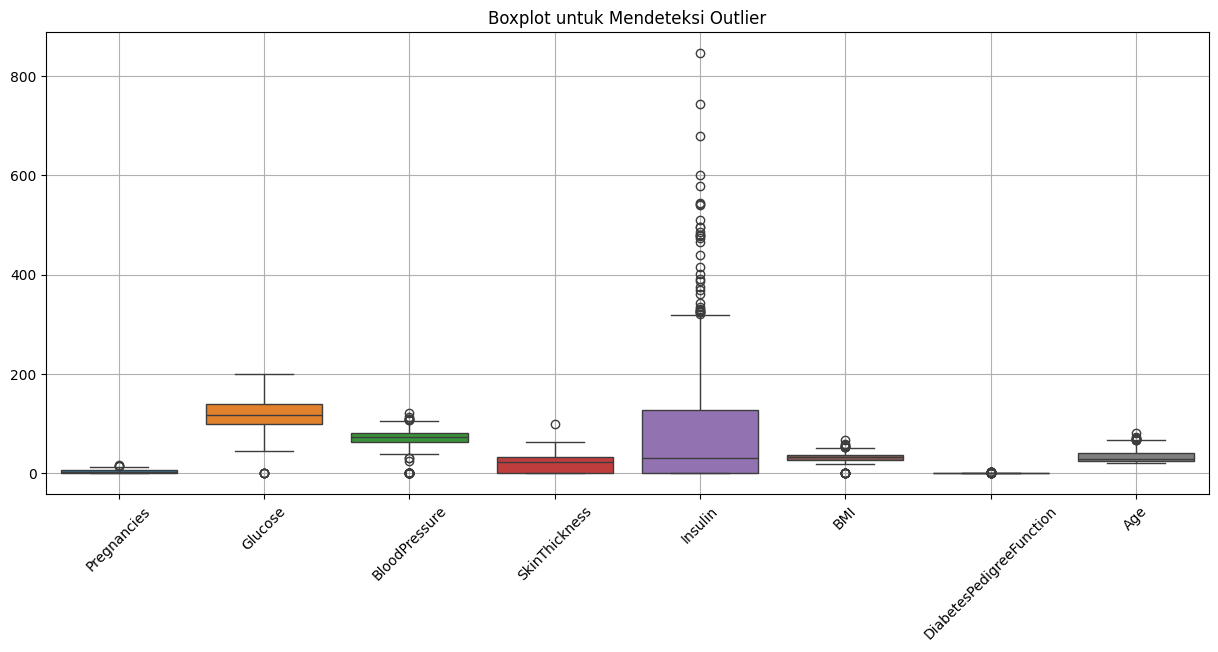

In [12]:
# Membuat Bloxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[columns_to_check])
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

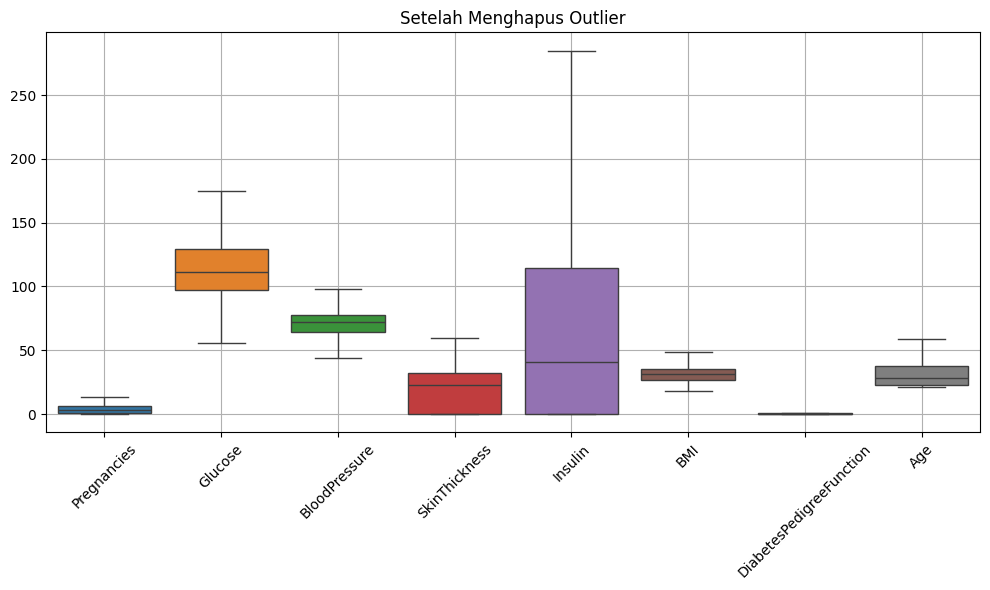

In [13]:
# Menentukan kolom numerik (kecuali Outcome)
columns_to_check = df.select_dtypes(include='number').columns.tolist()
if 'Outcome' in columns_to_check:
    columns_to_check.remove('Outcome')

# Menghapus outlier menggunakan metode IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Menghapus outlier secara iteratif
def remove_outliers_iteratively(df, columns, max_iter=10):
    for i in range(max_iter):
        df_new = remove_outliers_iqr(df.copy(), columns)
        if df_new.shape[0] == df.shape[0]:
            break
        df = df_new
    return df

# Terapkan fungsi
df = remove_outliers_iteratively(df.copy(), columns_to_check, max_iter=10)

# Plot hanya satu boxplot (tanpa subplot kosong)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_check])
plt.title("Setelah Menghapus Outlier")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# Menampilkan jumlah outlier yang terdeteksi di setiap kolom
outlier_dict = detect_outliers_iqr(df, columns_to_check)
for col, rows in outlier_dict.items():
    print(f"Jumlah outlier pada kolom {col}: {len(rows)}")

Jumlah outlier pada kolom Pregnancies: 0
Jumlah outlier pada kolom Glucose: 0
Jumlah outlier pada kolom BloodPressure: 0
Jumlah outlier pada kolom SkinThickness: 0
Jumlah outlier pada kolom Insulin: 0
Jumlah outlier pada kolom BMI: 0
Jumlah outlier pada kolom DiabetesPedigreeFunction: 0
Jumlah outlier pada kolom Age: 0


In [15]:
print(f"Jumlah baris sesudah: {df.shape[0]}")

Jumlah baris sesudah: 556


Dataset sekarang telah bersih dan memiliki 556 sampel dari dataset awal yaitu 768 sampel.

#### **2.2.3 Univariate Analysis**

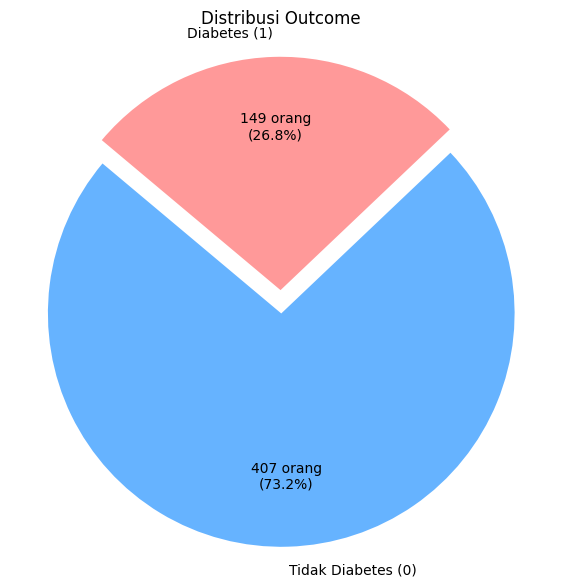

In [16]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing nilai pada kolom Outcome
outcome_counts = df['Outcome'].value_counts()
labels = ['Tidak Diabetes (0)', 'Diabetes (1)']
colors = ['#66b3ff', '#ff9999']

# Custom function untuk menampilkan count dan persen
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute} orang\n({pct:.1f}%)"

plt.figure(figsize=(7,7))
explode = (0.05, 0.05)  # sedikit melepaskan tiap irisan
plt.pie(
    outcome_counts,
    labels=labels,
    autopct=lambda pct: func(pct, outcome_counts),
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.7,   # jarak persen dari pusat
    labeldistance=1.1  # jarak label dari pusat
)
plt.title('Distribusi Outcome')
plt.axis('equal')
plt.show()

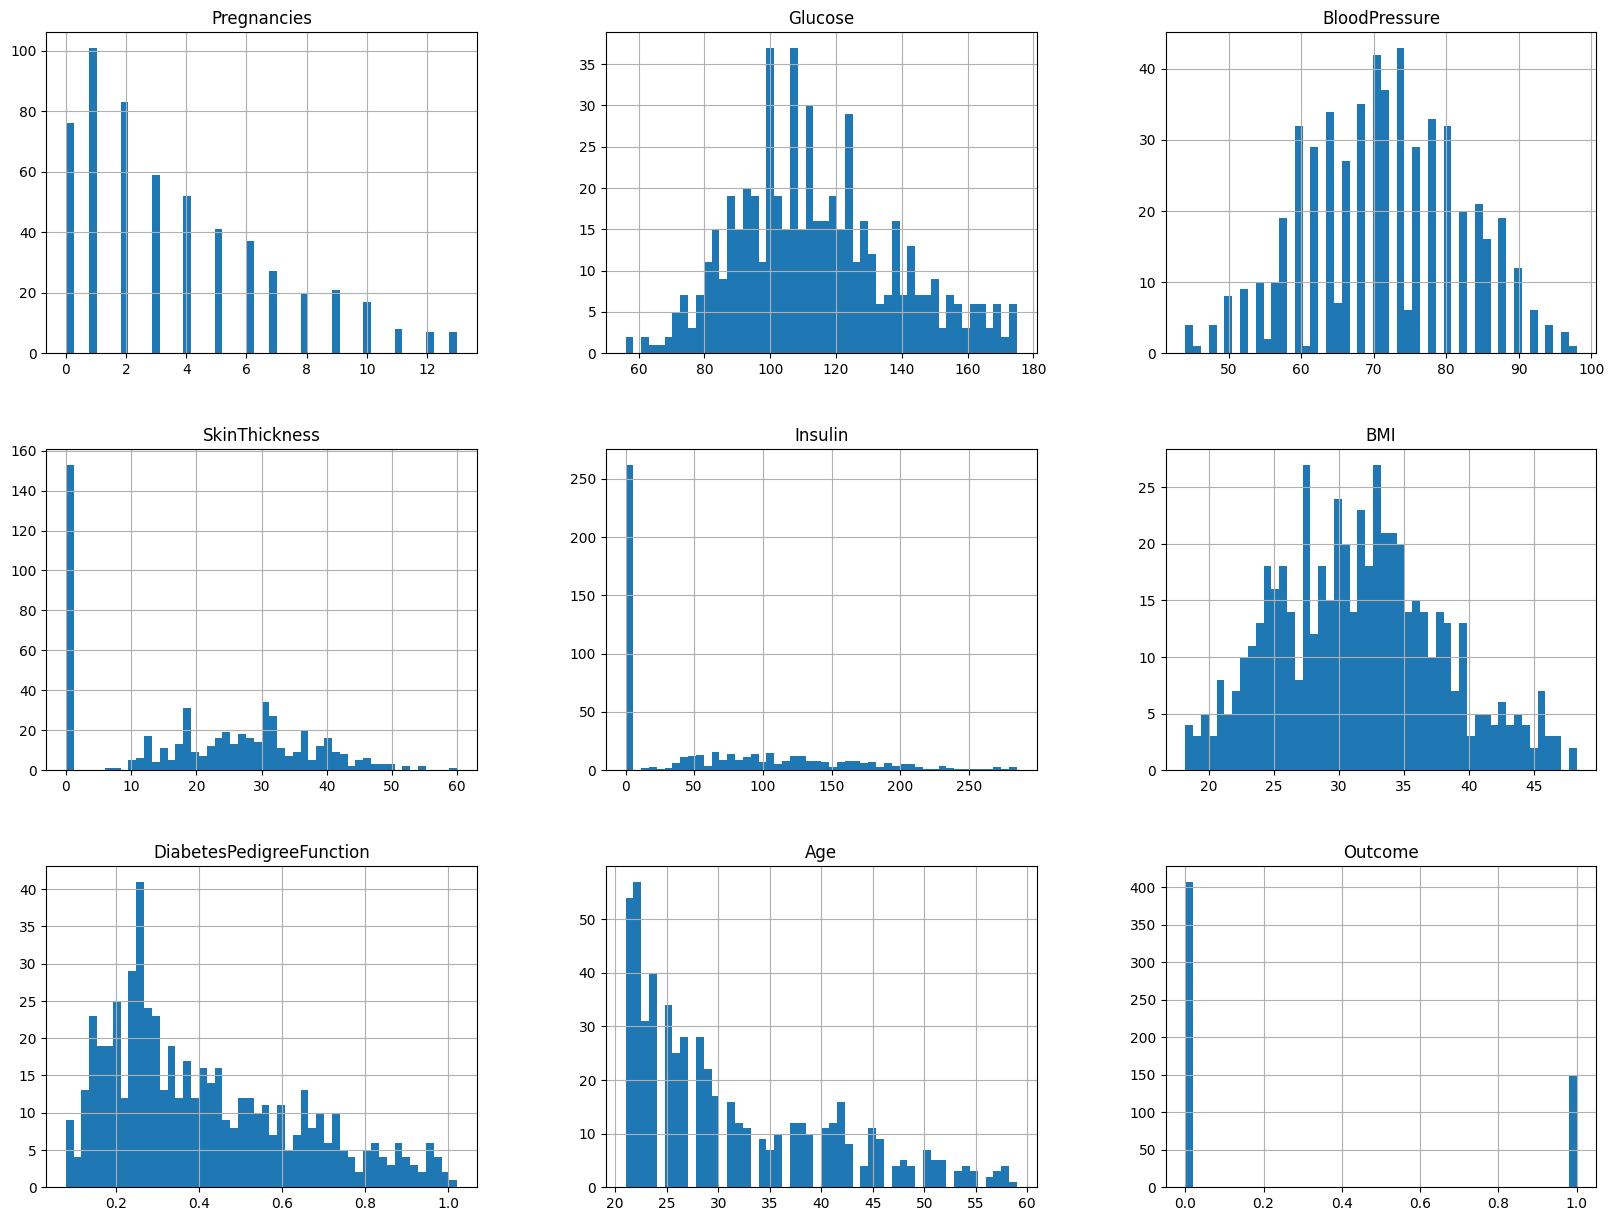

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Dari hasil analisis histogram di atas, dapat menyimpulkan beberapa hal penting yang akan berimplikasi pada tahap analisis dan pemodelan selanjutnya:
- Beberapa kolom, seperti Insulin dan SkinThickness, menunjukkan distribusi yang sangat miring atau banyak nilai 0.
- Beberapa variabel, seperti Glucose, BloodPressure, dan BMI, menunjukkan distribusi yang cukup normal, yang berarti mereka bisa digunakan langsung tanpa masalah besar.
- Kolom Outcome menunjukkan distribusi kelas yang tidak seimbang, yang akan mempengaruhi cara model melakukan prediksi dan mungkin memerlukan teknik penyeimbangan kelas.

### **2.2.4 Multivariate Analysis**

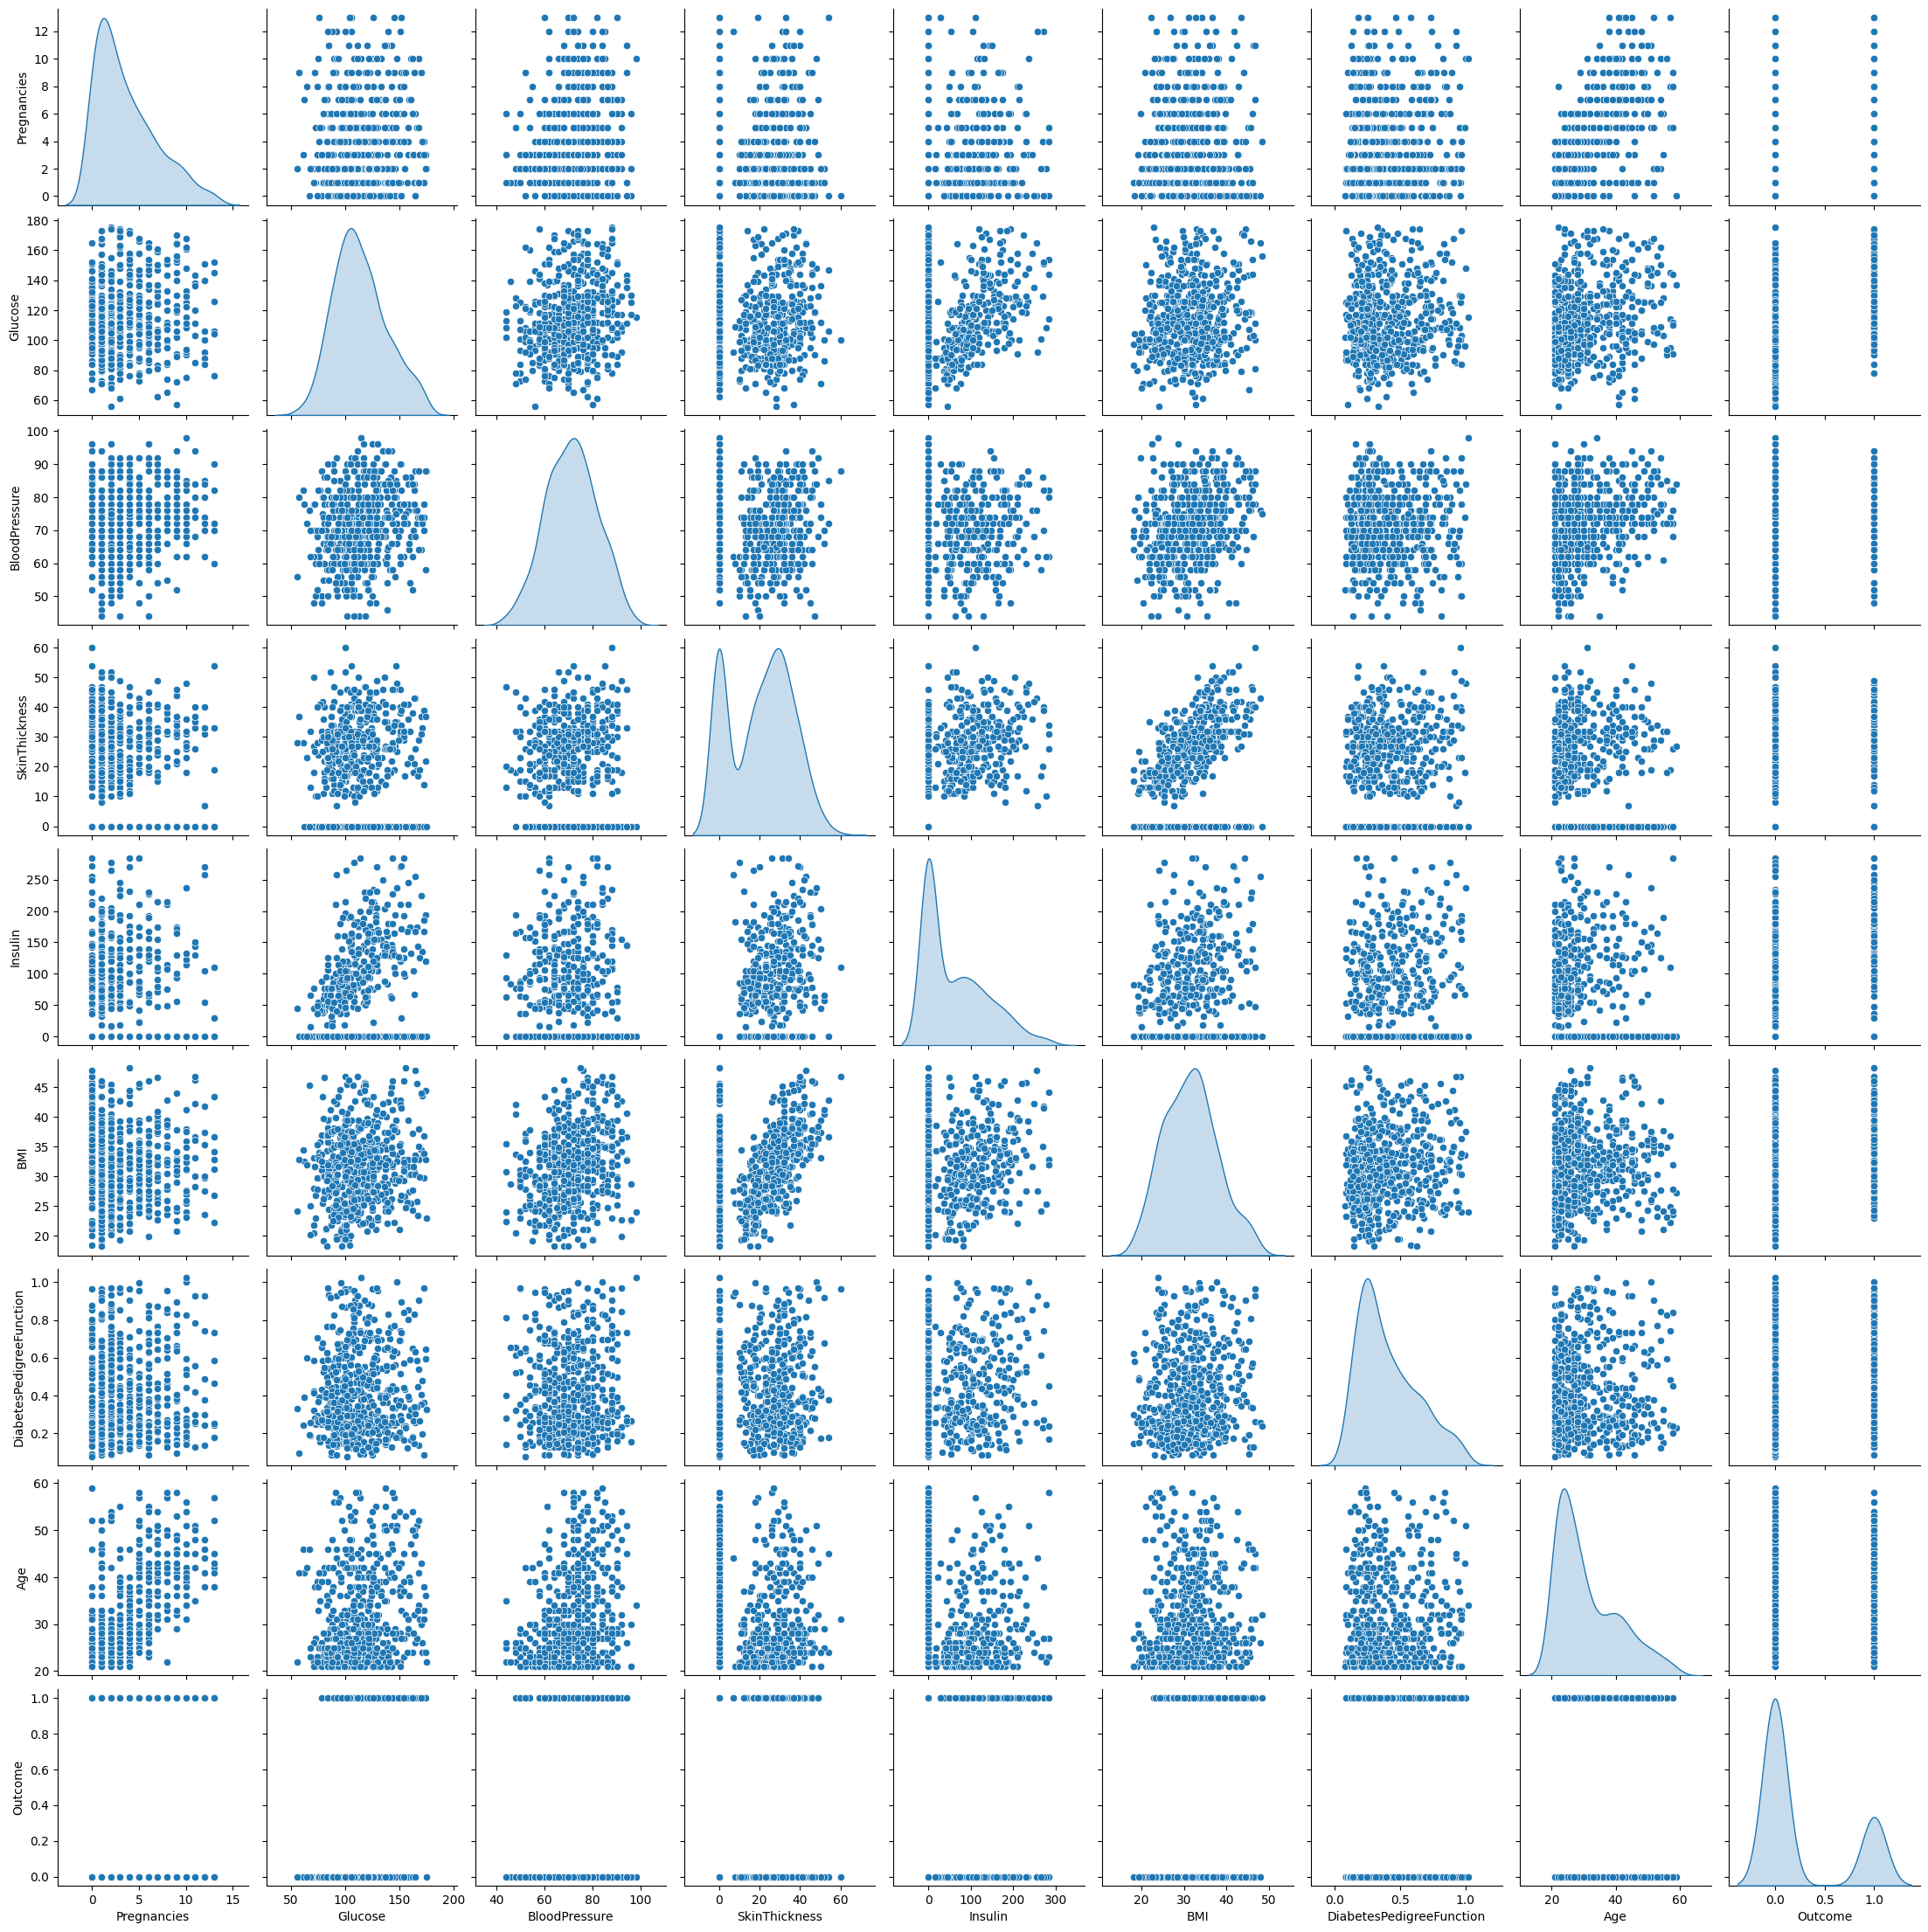

In [18]:
sns.pairplot(df, diag_kind = 'kde')

Dari pairplot ini, mendapatkan pemahaman yang lebih baik mengenai hubungan antar fitur, terutama fitur-fitur yang berhubungan dengan Outcome. Fitur seperti `age`, `insulin`, dan `BMI` menunjukkan adanya pola yang cukup relevan dengan kondisi diabetes (outcome = 1).

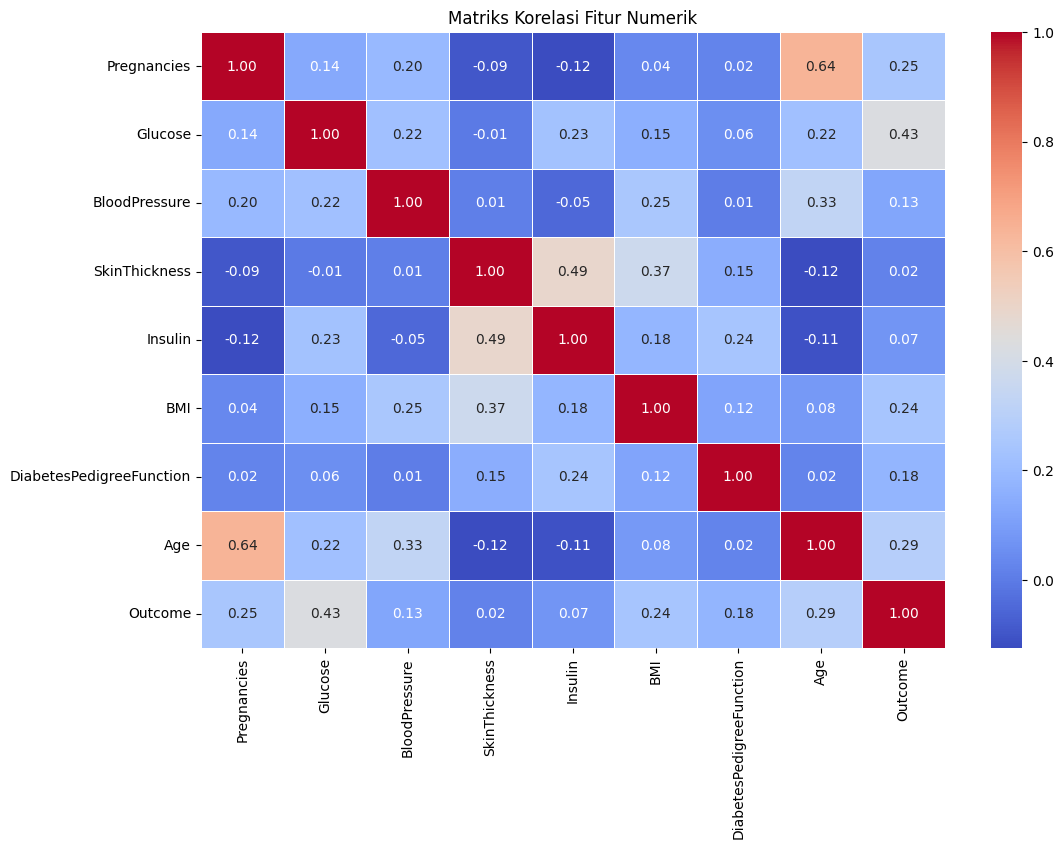

In [19]:
# Menghitung matriks korelasi untuk fitur numerik
correlation_matrix = df.corr()
# Membuat visualisasi heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

## **3. Data Preparation**

### **3.1 Split Data**
Pada tahap ini, dataset dibagi menjadi dua bagian yaitu data pelatihan (training data) dan data pengujian (test data). Pemisahan ini dilakukan agar model dapat dilatih pada data pelatihan dan diuji pada data yang terpisah untuk memastikan kemampuan generalisasi model terhadap data yang tidak terlihat sebelumnya

In [20]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

`test_size=0.2`: 20% data digunakan sebagai data pengujian, sisanya 80% sebagai data pelatihan.

`random_state=42`: Menjamin hasil pembagian data yang konsisten (reproducible).

In [21]:
# Melihat distribusi kelas
print("Distribusi kelas pada data pelatihan (y_train):")
print(y_train.value_counts())
print("Distribusi kelas pada data pengujian (y_test):")
print(y_test.value_counts())

Distribusi kelas pada data pelatihan (y_train):
Outcome
0    324
1    120
Name: count, dtype: int64
Distribusi kelas pada data pengujian (y_test):
Outcome
0    83
1    29
Name: count, dtype: int64


Pembagian data dilakukan dengan proporsi yang seimbang antara kelas dalam data pelatihan dan pengujian. Ini penting untuk menghindari bias pada model, terutama jika ada ketimpangan kelas (class imbalance). Parameter `random_state` digunakan agar eksperimen dapat direproduksi.

### **3.2 Standardisasi**

In [22]:
from sklearn.preprocessing import StandardScaler
# Inisialisasi objek scaler
scaler = StandardScaler()

# Melakukan fitting dan transformasi hanya pada fitur (X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Membuat DataFrame Hasil Standardisasi
df_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
df_scaled['Outcome'] = y_train.reset_index(drop=True)

In [24]:
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-1.139048,-0.296986,-0.922834,0.580369,0.135153,0.772158,1.515812,-0.672165,1
1,-1.139048,-0.048581,0.407485,-1.371289,-0.857601,0.251391,-0.587158,-0.877139,1
2,-0.832726,0.199825,1.547758,1.295977,1.423050,2.145089,0.418229,-0.569679,0
3,1.311526,1.524654,0.597531,0.710480,1.959674,1.766349,0.457742,0.455189,1
4,-1.139048,0.945041,-0.352697,-0.460515,1.127907,-1.089978,-1.179853,-1.082112,0


## **4. Model Development**

##### Support Vector Machine (SVM)
Pada tahap ini, dilakukan pembangunan model klasifikasi menggunakan algoritma Support Vector Machine (SVM) dengan kernel linear. Model dilatih menggunakan data pelatihan, kemudian dievaluasi dengan data pengujian untuk mengukur performa klasifikasi.

In [25]:
# Inisialisasi model SVM
model_svm_linear = SVC(kernel='linear', C=1, random_state=42)
model_svm_linear.fit(X_train, y_train)

y_pred_svm = model_svm_linear.predict(X_test)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
svm_acc_score = accuracy_score(y_test, y_pred_svm)

In [26]:
# Menampilkan nilai akurasi model
print("Nilai Akurasi untuk model SVM dengan Kernel Linear: {:.2f}%".format(svm_acc_score * 100, '%\n'))
print("Classification Report untuk SVM dengan Kernel Linear:")
print(classification_report(y_test, y_pred_svm))

Nilai Akurasi untuk model SVM dengan Kernel Linear: 82.14%
Classification Report untuk SVM dengan Kernel Linear:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        83
           1       0.71      0.52      0.60        29

    accuracy                           0.82       112
   macro avg       0.78      0.72      0.74       112
weighted avg       0.81      0.82      0.81       112



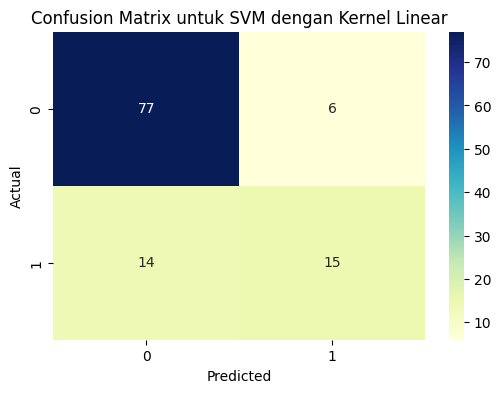

In [27]:
# Membuat confusion matrix dari hasil prediksi
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Confusion Matrix untuk SVM dengan Kernel Linear')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Dari confusion matrix, dapat disimpulkan bahwa:

- Kelas 0 (negatif) diprediksi dengan sangat baik (precision 85%, recall 93%).

- Kelas 1 (positif) kurang optimal (precision 71%, recall 52%).

##### Logistic Regression
Model Logistic Regression ini digunakan untuk mengklasifikasikan data ke dalam dua kelas target berdasarkan fitur yang telah diproses sebelumnya.

In [28]:
# Inisialisasi model Logistic Regression
logreg = LogisticRegression()

# Melakukan pelatihan model menggunakan data yang sudah diskalakan
logreg.fit(X_train_scaled, y_train)

# Memprediksi hasil pada data uji
y_pred = logreg.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8303571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        83
           1       0.75      0.52      0.61        29

    accuracy                           0.83       112
   macro avg       0.80      0.73      0.75       112
weighted avg       0.82      0.83      0.82       112



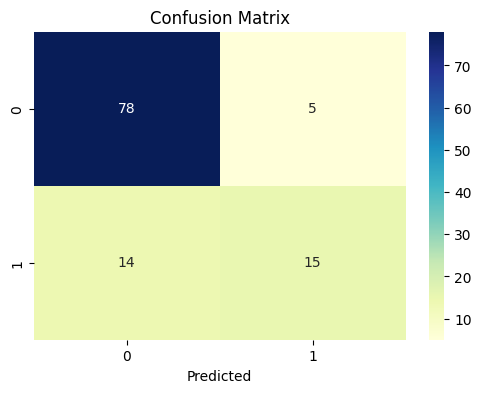

In [29]:
# Membuat confusion matrix dari hasil prediksi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.show()

Hasil:
- Kelas 0 (negatif) diprediksi sangat baik (precision tinggi dan recall tinggi).

- Kelas 1 (positif) memiliki precision cukup baik, namun recall masih rendah.

## **5. Evaluasi Model**
Evaluasi dilakukan dengan membandingkan nilai akurasi dari masing-masing model berdasarkan data pengujian.

In [30]:
# Menampilkan hasil akurasi
print("\nAkurasi Model:")
print(f"SVM (Kernel Linear): {svm_acc_score * 100:.2f}%")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Akurasi Model:
SVM (Kernel Linear): 82.14%
Logistic Regression: 83.04%


<ipython-input-31-394e457e9fea>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


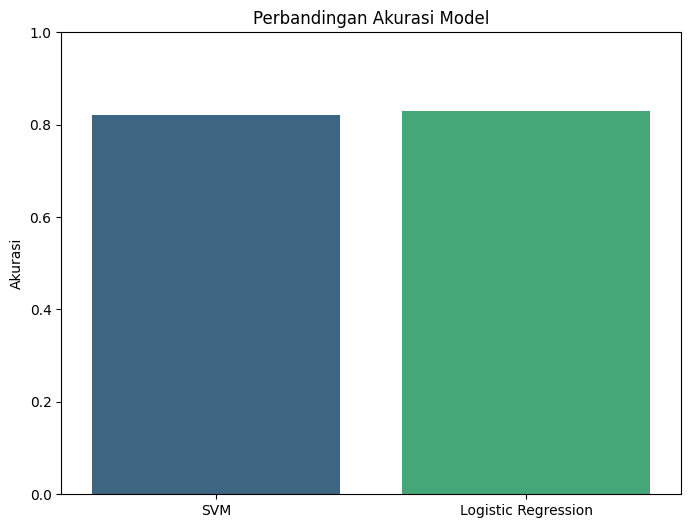

In [31]:
# Visualiasi Perbandingan Akurasi
models = ['SVM', 'Logistic Regression']
accuracies = [svm_acc_score, accuracy_score(y_test, y_pred)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()

### Evaluasi Model: Perbandingan Akurasi SVM dan Logistic Regression

Grafik di atas menunjukkan perbandingan akurasi antara dua model klasifikasi yang digunakan, yaitu **SVM (Support Vector Machine) dengan kernel linear** dan **Logistic Regression**.

- **SVM (Kernel Linear)** memperoleh akurasi sebesar **82.14%**.
- **Logistic Regression** sedikit lebih unggul dengan akurasi sebesar **83.04%**.

### Interpretasi:
- Kedua model memiliki performa yang cukup baik dengan akurasi di atas 80%.
- Meskipun perbedaan akurasi antara keduanya tidak signifikan (sekitar 0.9%), **Logistic Regression menunjukkan hasil yang sedikit lebih baik dibandingkan SVM dalam konteks dataset ini**.
- Selain itu, **SVM** mungkin lebih cocok untuk kasus dengan data berdimensi tinggi, sedangkan **Logistic Regression** seringkali lebih mudah diinterpretasikan dan diimplementasikan.
- Jika interpretabilitas dan efisiensi komputasi lebih diutamakan, maka Logistic Regression bisa menjadi pilihan. Namun jika fokus pada margin klasifikasi yang optimal dan ada kemungkinan data berdimensi tinggi, SVM tetap merupakan alternatif yang kuat.
